# Deployment

## Data 

In [2]:
import pandas as pd

In [3]:
## Dataset link - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
DATASET = './loan_approval_dataset.csv'

In [4]:
df = pd.read_csv(DATASET)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Exploratory Data Analysis 

In [5]:
from collections import Counter 
import matplotlib.pyplot as plt 
import seaborn as sns 

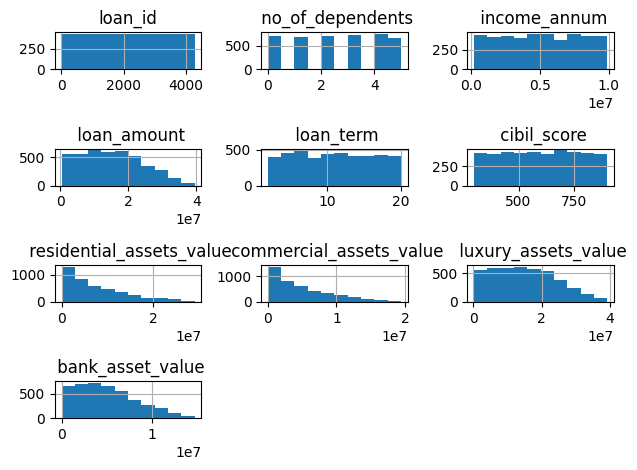

In [6]:
# Most commong tags
df.hist()
# plt.figure(figsize=(40, 22))  # Adjust the width and height as needed
plt.tight_layout()  # Optional: Improve spacing between subplots
plt.show()

In [7]:
# Renaming the column
df = df.rename(columns = {col_name: col_name.strip() for col_name in df.columns}) # Stripping the column name
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [9]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

### Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
df.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [12]:
df_processed = df.copy()

In [13]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'graduate':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['education'] = df_processed['education'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'approved':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['loan_status'] = df_processed['loan_status'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [15]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'yes':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['self_employed'] = df_processed['self_employed'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [16]:
df_processed['total_asset'] = df_processed['luxury_assets_value'] + df_processed['commercial_assets_value'] + df_processed['residential_assets_value'] 
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_asset
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,42700000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,13700000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,44900000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,44800000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,50000000


## Hyperparameters tuning using optuna

In [17]:
import math 
import numpy as np 
import seaborn as sns
import xgboost as xgb
import optuna
from sklearn.model_selection import cross_val_score
import mlflow

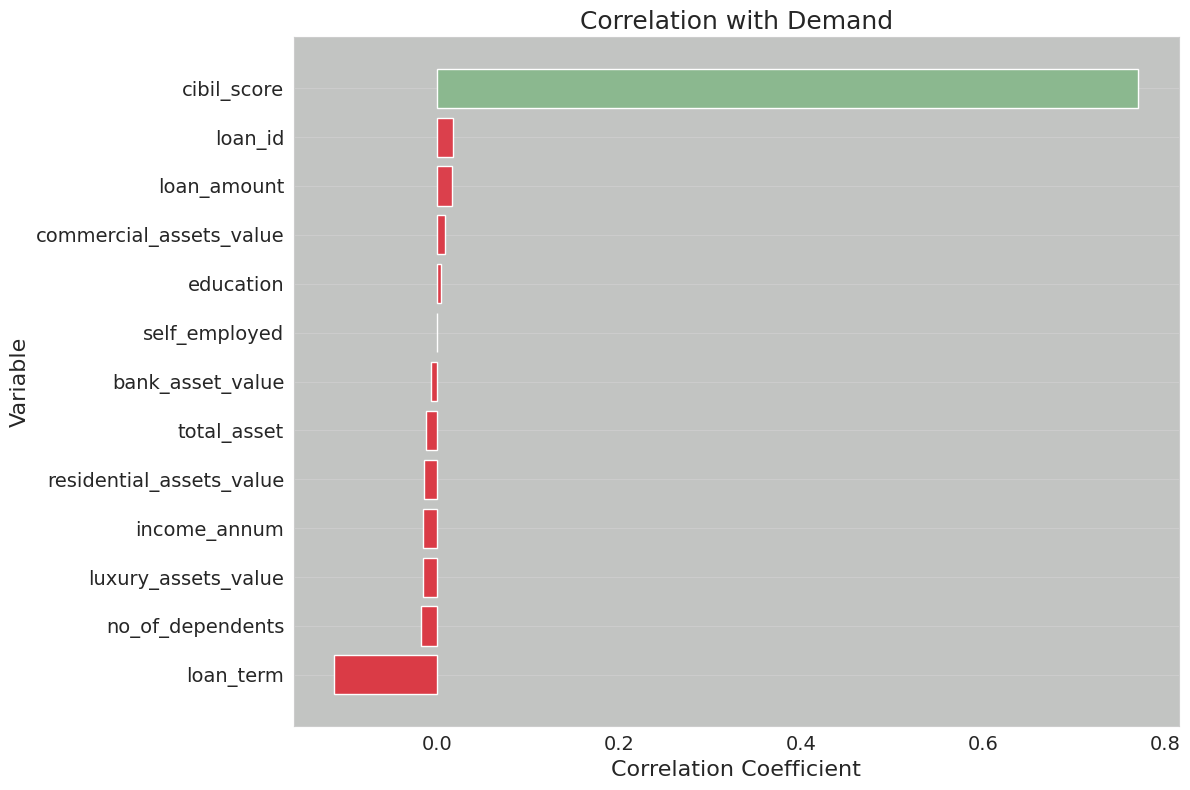

In [18]:
def plot_correlation(df, save_path=None): 
    """
    Plots the correlation of each variable in the dataframe with the demand column
    """
    correlations = df.corr()['loan_status'].drop('loan_status').sort_values()
    colors = sns.diverging_palette(10, 130, as_cmap=True) 
    color_mapped = correlations.map(colors) 

    sns.set_style(
        "whitegrid", {"axes.facecolor": "#c2c4c2", "grid.linewidth": 1.5}
    )

    fig = plt.figure(figsize=(12, 8))
    plt.barh(correlations.index, correlations.values, color=color_mapped) 

    plt.title("Correlation with Demand", fontsize=18) 
    plt.xlabel("Correlation Coefficient", fontsize=16) 
    plt.ylabel("Variable", fontsize=16) 
    plt.xticks(fontsize=14) 
    plt.yticks(fontsize=14) 
    plt.grid(axis="x")

    plt.tight_layout()

    # plt.show()
    return fig 

correlation_plot = plot_correlation(df_processed)
    

In [19]:
def plot_feature_importance(model, booster): 
    """
    Plost feature importance for an XGBoost model.
    """ 
    fig, ax = plt.subplots(figsize=(10, 8)) 
    importance_type = "weight" if booster == "gblinear" else "gain" 
    xgb.plot_importance(
        model, 
        importance_type=importance_type, 
        ax=ax, 
        title=f"Feature Importance based on {importance_type}", 
    )
    plt.tight_layout() 
    plt.show()


In [20]:
# override Optuna's default logging to ERROR only 
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [21]:
def objective(trial):
    # Define the hyperparameters to optimize
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 110),
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        # 'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True)
        # 'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        # 'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        # 'gamma': trial.suggest_loguniform('gamma', 1e-8, 1e-1),
        # 'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-6, 1e-1),
        # 'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-6, 1e-1),
    }
    
    # Create XGBoost classifier with suggested hyperparameters
    clf = XGBClassifier(**param)
    
    # Evaluate model using cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Return the negative mean accuracy because Optuna minimizes the objective function
    return -cv_scores.mean()

In [22]:
import mlflow
import os
experiment_name = "loan approval"
ml_path = os.path.join(os.getcwd(),"mlruns")
mlflow.set_tracking_uri(uri=ml_path)
#  mlflow.set_tracking_uri(uri="http://localhost:8080")
# experiment_id = mlflow.set_experiment(experiment_name).experiment_id 
if not mlflow.get_experiment_by_name(experiment_name):
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [23]:
from xgboost import XGBClassifier 
import mlflow 
from sklearn.metrics import accuracy_score
from mlflow.models import infer_signature 
import warnings
warnings.filterwarnings('ignore')

In [24]:
dataset = mlflow.data.from_pandas(
    df_processed, name="Loan Approval Dataset", targets="loan_status"
)

In [25]:
test_size = 0.2 
train_df, val_df = train_test_split(df_processed, stratify=df.loan_status, test_size=test_size, random_state=1234) 

In [26]:
X_train = train_df.drop(columns = ['loan_status'], axis = 1) 
y_train = train_df['loan_status']

In [27]:
X_val = val_df.drop(columns = ['loan_status'], axis = 1) 
y_val = val_df['loan_status']

In [28]:
xgb_classifier = XGBClassifier(
    n_estimators=10, 
    max_depth=3, 
    learning_rate=1, 
    objective="binary:logistic", 
    random_state=123, 
)


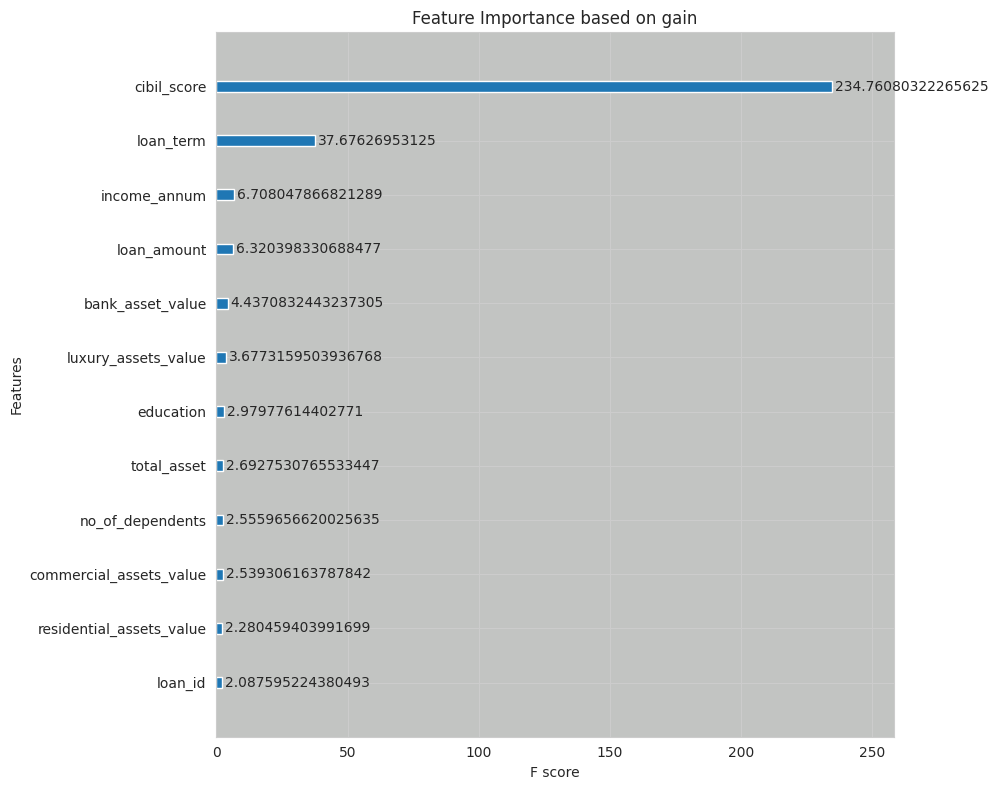

In [29]:
with mlflow.start_run(experiment_id=experiment_id, nested=True, run_name="hyperparameter_tune"):
    
    study = optuna.create_study(direction='minimize')

    study.optimize(objective, n_trials=5)
    
    mlflow.log_params(study.best_params) 
    mlflow.log_metric("acc", -study.best_value) 

    
    model = xgb.XGBClassifier(**study.best_params)
    model.fit(X_train, y_train)   #, eval_set=[(X_val, y_valid)], early_stopping_rounds=10, verbose=False)
    mlflow.log_figure(figure=correlation_plot, artifact_file="correlation_plot.png")

    importances = plot_feature_importance(model, booster=study.best_params.get("booster"))

    artifact_path = "model"

    mlflow.xgboost.log_model(
        xgb_model=model,
        artifact_path=artifact_path,
        input_example=X_train.iloc[[0]],
        model_format="ubj",
        metadata={"model_data_version": 1},
    )
    
    
    preds = model.predict(X_val)
    # print(preds)
    preds = [1 if x>0.5 else 0 for x in preds]
    acc = accuracy_score(y_val, preds)

    model_uri = mlflow.get_artifact_uri(artifact_path)
    

In [30]:
print(model_uri)
loan_classifier = mlflow.xgboost.load_model(model_uri)

/home/thebeginner86/code/MLOps/ML/mlruns/906616594024732302/44a523225df245409793505f1384563c/artifacts/model


## Deployment

### Setting up ray

In [31]:
import ray
from fastapi import FastAPI
from ray import serve
import requests
from starlette.requests import Request

In [ ]:
if ray.is_initialized():
    ray.shutdown()

ray.init()
# Forward the port to see the logs

2024-12-09 17:53:23,862	INFO worker.py:1810 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.12
Ray version:,2.39.0
Dashboard:,http://127.0.0.1:8265


In [33]:
ray.cluster_resources()

{'CPU': 8.0,
 'object_store_memory': 648182169.0,
 'memory': 1296364340.0,
 'node:__internal_head__': 1.0,
 'node:192.168.183.173': 1.0}

In [34]:
num_workers = 2 
resources_per_worker = {"CPU": 4}
MLFLOW_TRACKING_URI = "http://localhost:8080"

### Starlette 

In [35]:
from starlette.requests import Request

import ray
from ray import serve

In [36]:
@serve.deployment(num_replicas=2, ray_actor_options={'num_cpus':0.2, 'num_gpus':0})
class Model:
    def __init__(self):
        mlflow.set_tracking_uri(MLFLOW_TRACKING_URI) 
        self.predictor = mlflow.xgboost.load_model(model_uri)
        
    def predict(self, input_data: list):
        # Perform prediction using the loaded model
        prediction = self.predictor.predict_proba(input_data)
        return {"prediction": prediction.tolist()}

    async def __call__(self, http_request: Request) -> str:
        data: str = await http_request.json() 
        return self.predict(data)


In [37]:
loan_predictor = Model.bind()

In [ ]:
serve.run(loan_predictor)

(ProxyActor pid=275315) INFO 2024-12-09 17:53:41,291 proxy 192.168.183.173 proxy.py:1202 - Proxy starting on node 7c76a3521edd0baadbcb0a694aa189d1d1ae24941c3900e11aaaef46 (HTTP port: 8000).
(ServeController pid=275314) INFO 2024-12-09 17:53:41,414 controller 275314 deployment_state.py:1617 - Deploying new version of Deployment(name='Model', app='default') (initial target replicas: 2).
(ServeController pid=275314) INFO 2024-12-09 17:53:41,517 controller 275314 deployment_state.py:1863 - Adding 2 replicas to Deployment(name='Model', app='default').
(ServeReplica:default:Model pid=275316) INFO 2024-12-09 17:55:35,400 default_Model mt22j736 321f6fbb-9593-4fc2-b8ea-3958111ba0c7 / replica.py:431 - __CALL__ OK 14.3ms


INFO 2024-12-09 17:53:41,388 serve 273673 api.py:239 - Started Serve in namespace "serve".
INFO 2024-12-09 17:53:48,566 serve 273673 client.py:312 - Application 'default' is ready at http://127.0.0.1:8000/.
INFO 2024-12-09 17:53:48,568 serve 273673 api.py:502 - Deployed app 'default' successfully.


DeploymentHandle(deployment='Model')

WARNING 2024-12-09 17:53:49,473 serve 273673 pow_2_scheduler.py:572 - Failed to get queue length from Replica(id='9tpvwqzs', deployment='Model', app='default') within 0.1s. If this happens repeatedly it's likely caused by high network latency in the cluster. You can configure the deadline using the `RAY_SERVE_QUEUE_LENGTH_RESPONSE_DEADLINE_S` environment variable.
